records :  768
features :  9
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
(768,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodP

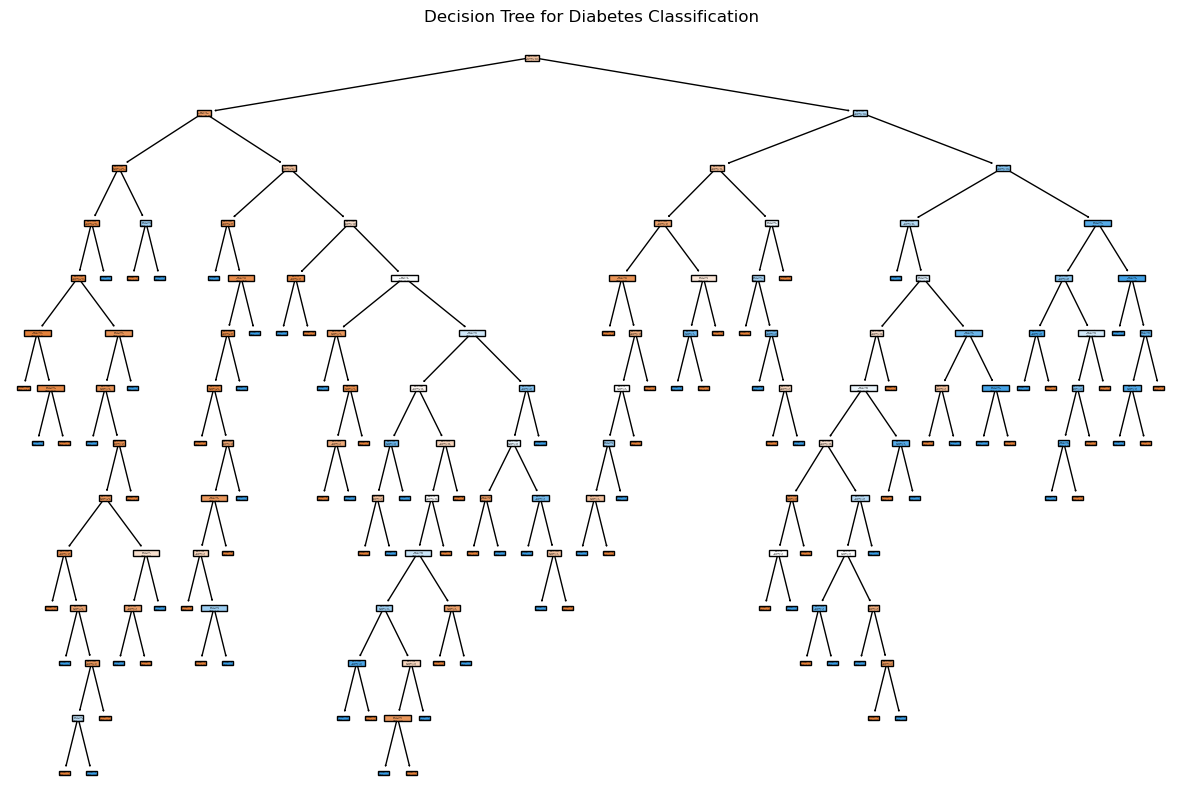

[[100  25]
 [ 33  34]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       125
           1       0.58      0.51      0.54        67

    accuracy                           0.70       192
   macro avg       0.66      0.65      0.66       192
weighted avg       0.69      0.70      0.69       192

predicted:  [1]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("C:\\Trash\\diabetes.csv")

x = df.iloc[:,:-1]

y = df.iloc[:,-1]

print("records : ",df.shape[0])
print("features : ",df.shape[1])

print(df.columns)

print(y.shape)

print(df.info())

print(df.describe())

print(df.isnull().sum())

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=1,stratify=y)

decision_tree_classifier = DecisionTreeClassifier()

decision_tree_classifier.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
tree.plot_tree(decision_tree_classifier, feature_names=x.columns, filled=True)
plt.title("Decision Tree for Diabetes Classification")
plt.show()
y_pred = decision_tree_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

cr = classification_report(y_test, y_pred)
print(cr)

new_record = {'Pregnancies': 6, 'Glucose': 140, 'BloodPressure': 72, 'SkinThickness': 35, 'Insulin': 0, 'BMI': 33.6, 'DiabetesPedigreeFunction': 0.627, 'Age': 50}

new_record_array = np.array(new_record).reshape(1, -1)


new_record_list = []

for key, value in new_record.items():
    new_record_list.append(float(value))

new_record_array = np.array(new_record_list).reshape(1, -1)

diabetes_pred = decision_tree_classifier.predict(new_record_array)

print("predicted: ",diabetes_pred)